# The `xarray.Dataset` structure for AITA

[`xarrayaita`](https://gricad-gitlab.univ-grenoble-alpes.fr/mecaiceige/tools/lib_python/xarray_aita) is a dataset accessor for [`xarray`](http://xarray.pydata.org/en/stable/). In this section we explain what is the minimal construction you have to do and what functions you can apply through this `xarrayaita`

## The minimal structure of `xarrayaita`

In [6]:
import xarrayaita.loadData_aita as lda #here are some functions to build the xarrayaita structure
import xarrayaita.aita as xa

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xarray as xr

Load data to show an exemple.

In [2]:
# path to data and microstructure
path_data='orientation_test.dat'
path_micro='micro_test.bmp'

In this case we use a constructor function that takes as input :
1. a `.dat` file which is an output from [G50 fabric analyser](http://www.russellheadinstruments.com/files/G50%20brochure%2009Jan08%20rev1.pdf). If you have another analyser it should be easy to implement another constructor function.
2. a `.bmp` which is the microstructure image (black and white, obtained from a segmentation for instance) that must have been extracted elsewhere to get the grain boundaries from the orientation image (grain boundaries are the white pixels). This input can be left empty

In [3]:
help(lda.aita5col)

Help on function aita5col in module xarrayaita.loadData_aita:

aita5col(adr_data, micro_adress=0)
    Function to load the data from G50 analyser that have 5 columns
    
    :param adr_data: path to the data
    :type adr_data: str
    :param micro_adress: path to microstructure file (black and white image where grains boundaries are white) `.bmp`
    :type micro_adress: str



In [4]:
data=lda.aita5col(path_data,path_micro)

### xarray.Dataset

The data structure is a regular `xarray.Dataset`. Therefore it can be used as one. (Pas clair!)

Some specific functions can be applied to it by:

`data.xa.FUNCTION`

You can visualise what is stored in your `xarray.Dataset` using:

In [5]:
data

<xarray.Dataset>
Dimensions:      (uvecs: 2, x: 1000, y: 2500)
Coordinates:
  * x            (x) float64 0.0 0.02 0.04 0.06 0.08 ... 19.92 19.94 19.96 19.98
  * y            (y) float64 49.98 49.96 49.94 49.92 49.9 ... 0.06 0.04 0.02 0.0
Dimensions without coordinates: uvecs
Data variables:
    orientation  (y, x, uvecs) float64 2.395 0.6451 5.377 ... 0.6098 0.6473
    quality      (y, x) int64 0 90 92 93 92 92 94 94 ... 96 96 96 96 96 97 97 96
    micro        (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    grainId      (y, x) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
Attributes:
    date:       Thursday, 19 Nov 2015, 11:24 am
    unit:       millimeters
    step_size:  0.02
    path_dat:   orientation_test.dat

There are 4 `xarray.DataArray` variables :
1. `orientation`: stores the orientation of each pixel as azimuth and colatitude (see figure below). It is meant to be used with [xarrayuvecs](https://github.com/ThomasChauve/xarray_uvecs) `DataArray`.
2. `quality`: the quality factor given by the analyser (between $[0,100]$).
3. `micro`: the binary microstructure image given as an input.
4. `grainId`: label for each grain of the microstructure. Each pixel of a grain as a given `grainId` label.

This is the minimal structure necessary to use the `xarrayaita` function.

## Visualisation of the variables
Every `Data variable` can be plotted using a regular xarray plot function

### Orientation variable
The data are stored as two angles, azimuth and colatitude

Text(0.5, 1.0, 'colatitude')

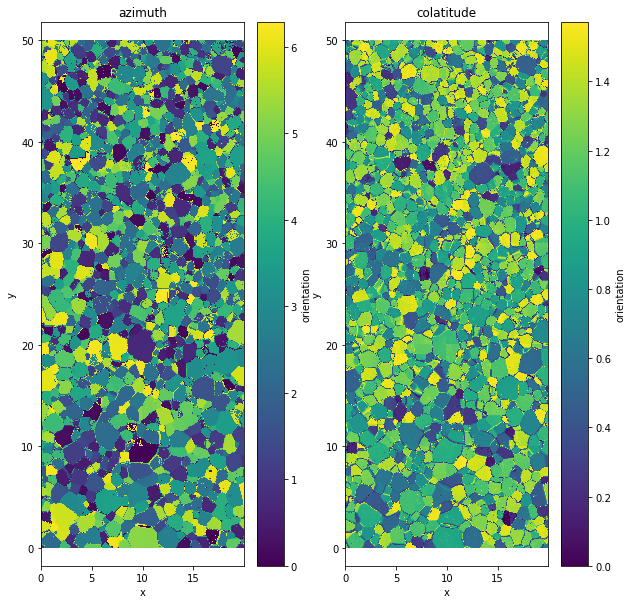

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
data.orientation[:,:,0].plot()
plt.axis('equal')
plt.title('azimuth')
plt.subplot(1,2,2)
data.orientation[:,:,1].plot()
plt.axis('equal')
plt.title('colatitude')

### Quality variable

Text(0.5, 1.0, 'quality')

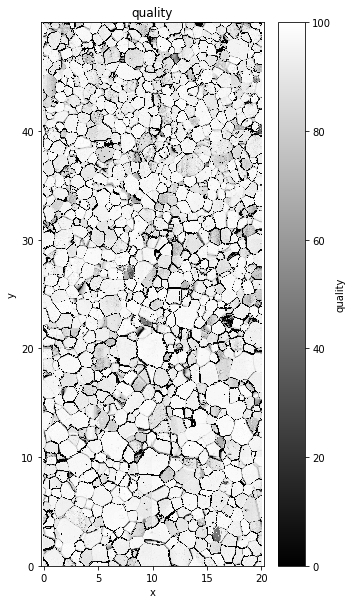

In [7]:
plt.figure(figsize=(5,10))
data.quality.plot(cmap=cm.gray)
plt.axis('equal')
plt.title('quality')

### GrainID variable

Text(0.5, 1.0, 'grainId')

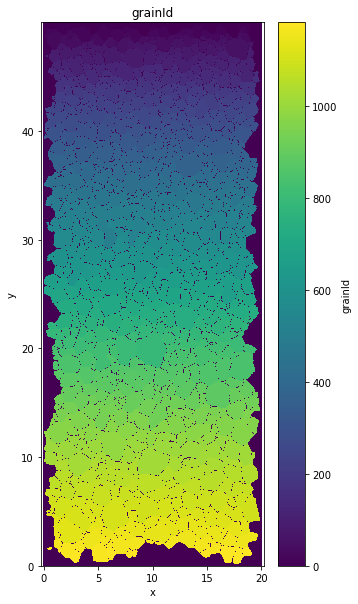

In [8]:
plt.figure(figsize=(5,10))
data.grainId.plot()
plt.axis('equal')
plt.title('grainId')

If you prefer to look at Bunge Euler angles you can extract them using uvecs

N.B. : TO DO, say how

All the variables are visible in your `xarray.Dataset`

## Functions within `xarrayaita`

### `xa.filter`
It only affects the orientation value. When the `data.quality` variable is below the given value `val` the orientation value is replaced by a `nan`. 

In [9]:
help(xa.aita.filter)

Help on function filter in module xarrayaita.aita:

filter(self, val)
    Put nan value in orientation file



In [10]:
data.aita.filter(75)

Text(0.5, 1.0, 'colatitude')

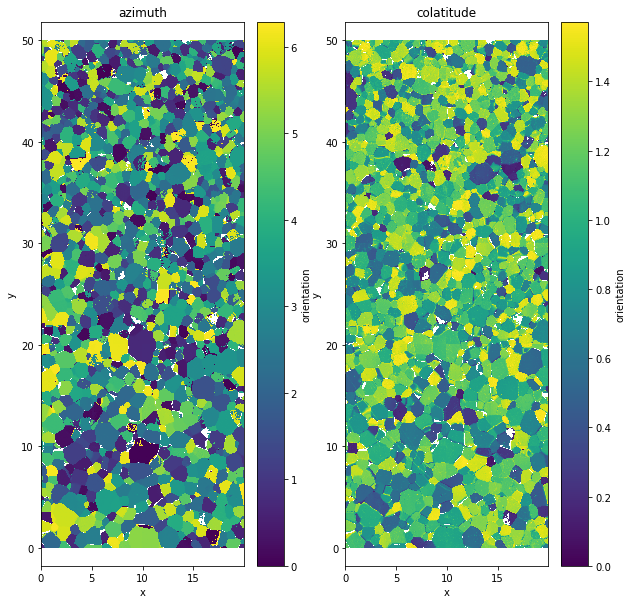

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
data.orientation[:,:,0].plot()
plt.axis('equal')
plt.title('azimuth')
plt.subplot(1,2,2)
data.orientation[:,:,1].plot()
plt.axis('equal')
plt.title('colatitude')

## Symmetry transformation

### `fliplr`
Flip the data with a horizontal mirror.

In [12]:
help(xa.aita.fliplr)

Help on function fliplr in module xarrayaita.aita:

fliplr(self)
    flip left right the data and rotate the orientation
    
    May be it is more a routation around the 0y axis of 180 degree



### `rot180`

In [13]:
help(xa.aita.rot180)

Help on function rot180 in module xarrayaita.aita:

rot180(self)
    rotate 180 degre around Oz the data and rotate the orientation



### `rot90c`

In [7]:
help(xa.aita.rot90c)

Help on function rot90c in module xarrayaita.aita_geom:

rot90c(self)
    Geometric transformation
    
    Rotate 90 degre in clockwise direction 
    
    Return :
        - xarray.Dataset : rotated dataset

